**Importiere die notwendigen Packages**

In [5]:
#%pip install geopandas fiona requests folium mplleaflet contextily

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 
import fiona
import requests
import mplleaflet
import seaborn as sns


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_fd_median_vermoegen_quartier_od1004


In [4]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/fd_median_vermoegen_quartier_OD1004/WIR100OD1004.csv "

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )
print("done")

done


In der Folge ein paar erste Tests:

In [5]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [6]:
data2betested

,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
0,1999,11,Rathaus,0,Grundtarif,20,0,150
1,1999,11,Rathaus,1,Verheiratetentarif,191,30,792
2,1999,11,Rathaus,2,Einelternfamilientarif,23,0,406
3,1999,12,Hochschulen,0,Grundtarif,28,0,186
4,1999,12,Hochschulen,1,Verheiratetentarif,249,37,724
...,...,...,...,...,...,...,...,...
2035,2018,122,Schwamendingen-Mitte,1,Verheiratetentarif,36,0,227
2036,2018,122,Schwamendingen-Mitte,2,Einelternfamilientarif,0,0,21
2037,2018,123,Hirzenbach,0,Grundtarif,12,0,69
2038,2018,123,Hirzenbach,1,Verheiratetentarif,37,0,178


In [7]:
data2betested.dtypes

SteuerJahr               int64
QuarSort                 int64
QuarLang                object
SteuerTarifSort          int64
SteuerTarifLang         object
SteuerVermoegen_p50    float64
SteuerVermoegen_p25    float64
SteuerVermoegen_p75    float64
dtype: object

In [8]:
data2betested.shape

(2040, 8)

Beschreibe einzelne Attribute

In [9]:
data2betested.describe()

,SteuerJahr,QuarSort,SteuerTarifSort,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
count,2040,2040,2040,1982,1982,1982
mean,2008,65,1,84,14,326
std,6,36,1,122,31,400
min,1999,11,0,0,0,7
25%,2004,33,0,16,0,94
50%,2008,67,1,39,1,188
75%,2013,92,2,82,8,356
max,2018,123,2,870,216,2620


Wie viele Nullwerte gibt es im Datensatz?

In [10]:
data2betested.isnull().sum()

SteuerJahr              0
QuarSort                0
QuarLang                0
SteuerTarifSort         0
SteuerTarifLang         0
SteuerVermoegen_p50    58
SteuerVermoegen_p25    58
SteuerVermoegen_p75    58
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [11]:
data2betested['SteuerJahr']=pd.to_datetime(data2betested['SteuerJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
0,1999-01-01,11,Rathaus,0,Grundtarif,20,0,150
1,1999-01-01,11,Rathaus,1,Verheiratetentarif,191,30,792
2,1999-01-01,11,Rathaus,2,Einelternfamilientarif,23,0,406
3,1999-01-01,12,Hochschulen,0,Grundtarif,28,0,186
4,1999-01-01,12,Hochschulen,1,Verheiratetentarif,249,37,724
...,...,...,...,...,...,...,...,...
2035,2018-01-01,122,Schwamendingen-Mitte,1,Verheiratetentarif,36,0,227
2036,2018-01-01,122,Schwamendingen-Mitte,2,Einelternfamilientarif,0,0,21
2037,2018-01-01,123,Hirzenbach,0,Grundtarif,12,0,69
2038,2018-01-01,123,Hirzenbach,1,Verheiratetentarif,37,0,178


Bereite die Daten für die Grafik unten vor

In [12]:
Jahre = data2betested.groupby("SteuerJahr")
len(Jahre)

20

In [13]:
for key, group in Jahre:
    print(key, len(group))

1999-01-01 00:00:00 102
2000-01-01 00:00:00 102
2001-01-01 00:00:00 102
2002-01-01 00:00:00 102
2003-01-01 00:00:00 102
2004-01-01 00:00:00 102
2005-01-01 00:00:00 102
2006-01-01 00:00:00 102
2007-01-01 00:00:00 102
2008-01-01 00:00:00 102
2009-01-01 00:00:00 102
2010-01-01 00:00:00 102
2011-01-01 00:00:00 102
2012-01-01 00:00:00 102
2013-01-01 00:00:00 102
2014-01-01 00:00:00 102
2015-01-01 00:00:00 102
2016-01-01 00:00:00 102
2017-01-01 00:00:00 102
2018-01-01 00:00:00 102


In [14]:
myJahr = "2018-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
1938,2018-01-01,11,Rathaus,0,Grundtarif,46,2,280
1939,2018-01-01,11,Rathaus,1,Verheiratetentarif,402,80,1557
1940,2018-01-01,11,Rathaus,2,Einelternfamilientarif,84,2,554
1941,2018-01-01,12,Hochschulen,0,Grundtarif,55,5,311
1942,2018-01-01,12,Hochschulen,1,Verheiratetentarif,559,174,2045
...,...,...,...,...,...,...,...,...
2035,2018-01-01,122,Schwamendingen-Mitte,1,Verheiratetentarif,36,0,227
2036,2018-01-01,122,Schwamendingen-Mitte,2,Einelternfamilientarif,0,0,21
2037,2018-01-01,123,Hirzenbach,0,Grundtarif,12,0,69
2038,2018-01-01,123,Hirzenbach,1,Verheiratetentarif,37,0,178


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [15]:
#test = data2betested.groupby(['Quartal'])[['stzh_frau']].agg('median')
#test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [16]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [17]:
mySelection = data2betested[(data2betested.QuarSort >1) & (data2betested.SteuerJahr == "2018")] #data2betested.SteuerTarifLang=="Grundtarif") & 
#mySelection = data2betested[['SteuerJahr', 'QuarLang', 'SteuerEInkommen_p50']]
#selVZA = data2betested[['Jahr', 'Quartal', 'stzh_VZA_Frauen', 'stzh_VZA_Maenner', 'stzh_VZA_s2', 'stzh_VZA_s3']]

mySelection.head()


,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
1938,2018-01-01,11,Rathaus,0,Grundtarif,46,2,280
1939,2018-01-01,11,Rathaus,1,Verheiratetentarif,402,80,1557
1940,2018-01-01,11,Rathaus,2,Einelternfamilientarif,84,2,554
1941,2018-01-01,12,Hochschulen,0,Grundtarif,55,5,311
1942,2018-01-01,12,Hochschulen,1,Verheiratetentarif,559,174,2045


In [18]:
myGraph = mySelection
myGraph.head()


,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
1938,2018-01-01,11,Rathaus,0,Grundtarif,46,2,280
1939,2018-01-01,11,Rathaus,1,Verheiratetentarif,402,80,1557
1940,2018-01-01,11,Rathaus,2,Einelternfamilientarif,84,2,554
1941,2018-01-01,12,Hochschulen,0,Grundtarif,55,5,311
1942,2018-01-01,12,Hochschulen,1,Verheiratetentarif,559,174,2045


In [20]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['SteuerTarifLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraph).encode(
    x='QuarLang',
    y='SteuerVermoegen_p50',
    color='SteuerTarifLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [22]:
alt.Chart(myGraph).mark_circle(size=60).encode(
    x='QuarLang',
    y='SteuerVermoegen_p50',
    color='SteuerTarifLang',
    tooltip=['SteuerJahr','QuarLang','SteuerVermoegen_p25', 'SteuerVermoegen_p50','SteuerVermoegen_p75']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

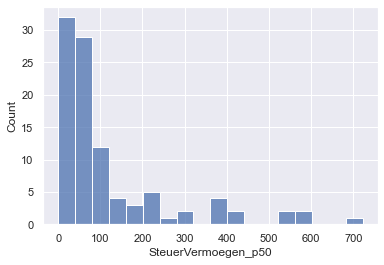

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=myGraph, x="SteuerVermoegen_p50") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [25]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [26]:
selectMapAttr1 = data2betested[(data2betested.SteuerTarifLang=="Grundtarif") & (data2betested.SteuerJahr == "2018")]
selectMapAttr2 = data2betested[(data2betested.SteuerTarifLang=="Verheiratetentarif") & (data2betested.SteuerJahr == "2018")]


In [27]:
selectMapAttr1.head()


,SteuerJahr,QuarSort,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
1938,2018-01-01,11,Rathaus,0,Grundtarif,46,2,280
1941,2018-01-01,12,Hochschulen,0,Grundtarif,55,5,311
1944,2018-01-01,13,Lindenhof,0,Grundtarif,76,5,402
1947,2018-01-01,14,City,0,Grundtarif,21,1,163
1950,2018-01-01,21,Wollishofen,0,Grundtarif,43,4,197


In [28]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(selectMapAttr1, on='QuarSort')

stadtquartiere_shapes_joined.head(3)


,geometry,QuarSort,qname,knr,SteuerJahr,QuarLang,SteuerTarifSort,SteuerTarifLang,SteuerVermoegen_p50,SteuerVermoegen_p25,SteuerVermoegen_p75
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,2018-01-01,Hirslanden,0,Grundtarif,66,10,308
1,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ...",83,Weinegg,8,2018-01-01,Weinegg,0,Grundtarif,60,6,296
2,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ...",82,Mühlebach,8,2018-01-01,Mühlebach,0,Grundtarif,66,7,300


<AxesSubplot:>

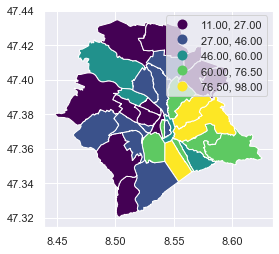

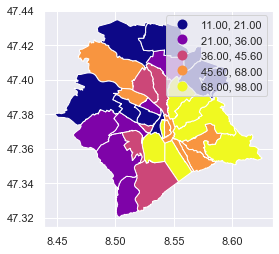

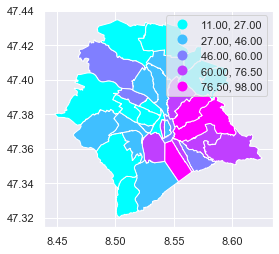

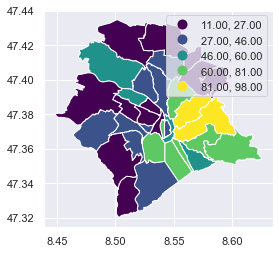

In [30]:
# Plot by StatQuartiere

stadtquartiere_shapes_joined.plot(column='SteuerVermoegen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='SteuerVermoegen_p50', cmap='plasma', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='SteuerVermoegen_p50', cmap='cool', scheme='fisherjenks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='SteuerVermoegen_p50', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

----------------------------------------------------------------------------------------

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html